In [1]:
#importing the required libraries and packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Question 1 (part a)

In [2]:
df = pd.read_csv('/content/CC.csv') #reading the data
df.head(5) #looking at the first five data points in dataset

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df['CUST_ID'] = df['CUST_ID'].apply(lambda x: x.replace('C', '') if isinstance(x, str) else x).astype(int) #removing the 'C' and converting into int rather than object

In [4]:
df.head(5) #looking at the data to see if "C" was removed from "CUST_ID" column

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
#df = df.drop(columns='CUST_ID') #dropping the customer id column
df.isnull().sum() #checking for null values and get the total for each column

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
new_df = df.apply(lambda x: x.fillna(x.mean()),axis=0) #creating new data set that does not contain the null values
new_df.isnull().sum() #checking for null values and get the total for each column in the new dataset

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Question 1 (part b)

In [7]:
x = new_df.iloc[:,1:5]  #getting columns starting from 1 to 5 
y = new_df.iloc[:-1] # reversing the order starting from the back 

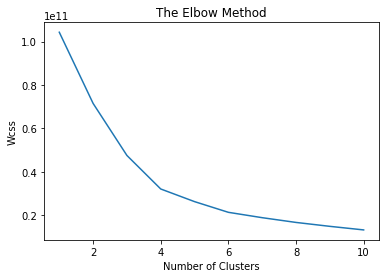

In [10]:
from sklearn.cluster import KMeans # importing KMeans package

wcss = []  #creating a list
for i in range(1,11): #for loop with range of 1-11
  kmeans = KMeans(n_clusters=i,
                  max_iter=300, random_state=0) #calling Kmeans funcction in the for loop and passing in i clusters
  kmeans.fit(x) #fitting the data with the kmeans
  wcss.append(kmeans.inertia_) #adding it to the list using the intertia value

plt.plot(range(1,11),wcss) # plotting the range 
plt.title('The Elbow Method') #title of the chart
plt.xlabel('Number of Clusters') # xlabel title
plt.ylabel('Wcss') # y label title
plt.show() #visualizing the plot

question 1 part(c)

In [11]:
y_cluster_kmeans = kmeans.predict(x) #applying trained model to data

from sklearn import metrics # importing metrics to calcualte the score
score = metrics.silhouette_score(x,y_cluster_kmeans) #passing in my variables to determine the score accuracy
print(round(score,3)) #printing the score rouned to 3 values 

0.436


Question 2

In [12]:
from sklearn import preprocessing #importing the requiqure packaged for stanndard scaler 

scaler = preprocessing.StandardScaler()
scaler.fit(x) #fitting the data

X_scaled_array = scaler.transform(x) #transforming into scaler
x_scaled = pd.DataFrame(X_scaled_array,columns=x.columns) # The scaled data 

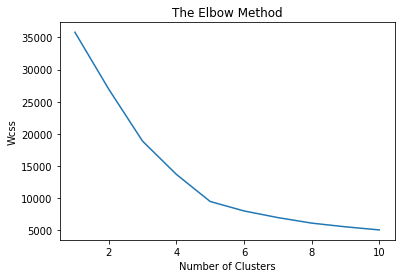

In [13]:
from sklearn.cluster import KMeans # importing KMeans package

wcss = []  #creating a list
for i in range(1,11): #for loop with range of 1-11
  kmeans = KMeans(n_clusters=i,
                  max_iter=300, random_state=0) #calling Kmeans funcction in the for loop and passing in i clusters
  kmeans.fit(x_scaled) # training the model with the data
  wcss.append(kmeans.inertia_) #adding it to the list using the intertia value

plt.plot(range(1,11),wcss) # plotting the range 
plt.title('The Elbow Method') #title of the chart
plt.xlabel('Number of Clusters') # xlabel title
plt.ylabel('Wcss') # y label title
plt.show() #visualizing the plot

In [14]:
y_cluster_kmeans = kmeans.predict(x_scaled) #applying trained model to data

from sklearn import metrics # importing metrics to calcualte the score
score = metrics.silhouette_score(x,y_cluster_kmeans) #passing in my variables to determine the score accuracy
print(round(score,3)) #printing the score rouned to 3 values 

0.125


Question 3

In [15]:
from sklearn.decomposition import PCA #importing PCA which uses orthogonal transformation
pca = PCA(2) #passing number of components 
x_pca = pca.fit_transform(x_scaled) #calling transform on the scaled data

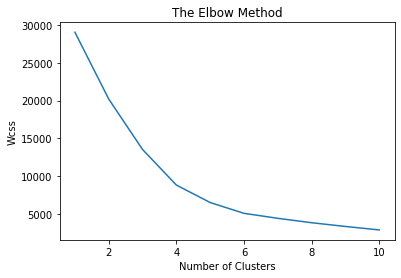

In [16]:
from sklearn.cluster import KMeans # importing KMeans package

wcss = []  #creating a list
for i in range(1,11): #for loop with range of 1-11
  kmeans = KMeans(n_clusters=i,
                  max_iter=300, random_state=0) #calling Kmeans funcction in the for loop and passing in i clusters
  kmeans.fit(x_pca) #fitting the data with the kmeans
  wcss.append(kmeans.inertia_) #adding it to the list using the intertia value

plt.plot(range(1,11),wcss) # plotting the range 
plt.title('The Elbow Method') #title of the chart
plt.xlabel('Number of Clusters') # xlabel title
plt.ylabel('Wcss') # y label title
plt.show() #visualizing the plot

In [17]:
y_cluster_kmeans = kmeans.predict(x_pca) #applying trained model to data

from sklearn import metrics # importing metrics to calcualte the score
score = metrics.silhouette_score(x,y_cluster_kmeans) #passing in my variables to determine the score accuracy
print(round(score,3)) #printing the score rouned to 3 values 

0.079
